In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [13]:
heart_data=pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [14]:
X = heart_data.drop(columns=['HeartDiseaseorAttack'])

In [15]:
Y = heart_data['HeartDiseaseorAttack']

In [16]:
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [17]:
model=DecisionTreeClassifier()

In [18]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [19]:
predictions=model.predict(X_test)

In [20]:
Accuracy = accuracy_score(Y_test,predictions)

In [21]:
print(Accuracy)

0.8511904761904762


In [22]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     45944
           1       0.24      0.27      0.26      4792

    accuracy                           0.85     50736
   macro avg       0.58      0.59      0.59     50736
weighted avg       0.86      0.85      0.86     50736



In [23]:
confusion_matrix(Y_test,predictions)

array([[41874,  4070],
       [ 3480,  1312]], dtype=int64)

In [24]:
plot_confusion_matrix(model, X_test, Y_test,display_labels = ['No', 'Yes']) 

NameError: name 'plot_confusion_matrix' is not defined

In [25]:
feature_names=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','Diabetes','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','AnyHealthcare','NoDocbcCost','Education','Income']

In [26]:
heart_data=pd.DataFrame(X, columns=feature_names)

In [27]:
for i in feature_names:
    print(i)

HighBP
HighChol
CholCheck
BMI
Smoker
Stroke
Diabetes
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age
AnyHealthcare
NoDocbcCost
Education
Income


In [28]:
heart_data[i]=heart_data[i] / heart_data[i].std()

In [29]:
import eli5
from eli5.sklearn import PermutationImportance

ModuleNotFoundError: No module named 'eli5'

In [30]:
perm = PermutationImportance(model, random_state=1).fit(X_test,Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

NameError: name 'PermutationImportance' is not defined

In [31]:
# Initialize a list of results
results = []


In [32]:
from sklearn.metrics import mean_squared_error
rmse_full_mod = mean_squared_error(model.predict(X_test), Y_test, squared = False)

In [33]:
# Iterate through each predictor
for predictor in X_test:
    
    # Create a copy of X_test
    X_test_copy = X_test.copy()
    
    # Scramble the values of the given predictor
    X_test_copy[predictor] = X_test[predictor].sample(frac=1).values
    
    # Calculate the new RMSE
    new_rmse = mean_squared_error(model.predict(X_test_copy), Y_test,
                                  squared = False)
    
    # Append the increase in MSE to the list of results 
    results.append({'pred': predictor,
                    'score': new_rmse - rmse_full_mod })

In [34]:
# Convert to a pandas dataframe and rank the predictors by score
resultsdf = pd.DataFrame(results).sort_values(by = 'score',
                                              ascending = False)

In [35]:
resultsdf

,pred,score
13,GenHlth,0.012816
18,Age,0.009190
20,Income,0.005958
5,Stroke,0.005328
17,Sex,0.003965
19,Education,0.003864
16,DiffWalk,0.003813
3,BMI,0.003788
15,PhysHlth,0.003130
6,Diabetes,0.002369


<Axes: xlabel='pred'>

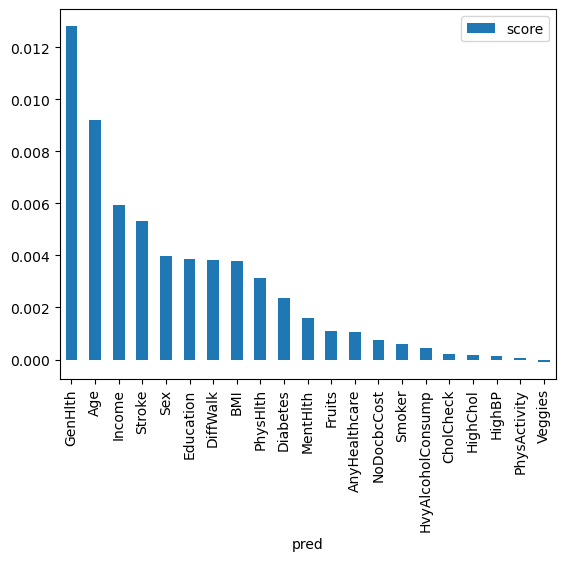

In [36]:
resultsdf.plot(x ='pred', y ='score', kind='bar')

In [37]:

importance = model.feature_importances_


In [38]:
importance

array([0.01715192, 0.01653508, 0.00466889, 0.1935736 , 0.02663733,
       0.02171656, 0.03024725, 0.03310398, 0.03857412, 0.02908113,
       0.01047187, 0.00784962, 0.01478576, 0.0821493 , 0.06535328,
       0.08717146, 0.02275555, 0.01868546, 0.09436636, 0.07739208,
       0.10772939])

In [39]:
heart_data.isnull()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,AnyHealthcare,NoDocbcCost,Education,Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
